# Welcome to Covid19 Data Analysis Notebook
------------------------------------------

### Task1: Import the modules 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


# Task 2.1: Import the covid19 dataset (Confirmed cases)


In [3]:
#Importing "Covid19_Confirmed_dataset.csv". 
covid_ds_csv = pd.read_csv("Databases/covid19_Confirmed_dataset.csv")
covid_ds_csv.head()  #display the first 5 rows

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


#### Explore the shape of the dataframe
Using the shape property of dataframe to get the number of rows and columns as a tuple

In [4]:
covid_ds_csv.shape  #Display number of rows an dcolumns in a tuple

(266, 104)

### Delete the irrelevant columns

To remove irrelevant columns, use the drop method with the list of columns. This method will generate a copy of dataset and removed the determined columns if the 'inplace' is False (default value).
Besides, the axis parameter by default is 0 which removes the rows, here we need to set it as 1.
In this dataset the columns with the value of location is not relevant with the analysis purpose, therefore, we remove "Lant" and "Long" columns.

In [5]:
# Remove irrelevant columns
df = covid_ds_csv.drop(["Lat","Long"], axis=1)
df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


### Task 2.3: Aggregate the rows by the country

Since we need data for each country and not for provinces, we aggregate all of the rows for all countries or regions by using groupby method and sum()

In [6]:
# Aggregate the data based on countries
df_aggregated = df.groupby("Country/Region").sum()

In [8]:
#Check the dataframe
df_aggregated.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


As we can see after aggregation the index of the data is  name of Country/Region which is easier to access the countries with their name.

In [9]:
df_aggregated.shape

(187, 101)

### Task 2.4: Visualize data related to a country for example China
visualization always helps for better understanding of our data.
When we use .loc method to return the values for a column, it returns a serie.

I faced a challenge when I wanted to run the code from guided project in Kaggle. As the following try...except block shows, the type of data is object and it gives me error when I try to use this code "df_aggregated.loc["China"].plot()" - as is worked in guided project and run by google colab!!!.

In [22]:
try:
    df_aggregated.loc["China"].plot()
except TypeError as e:
    print("Error occurred:", e)
    print("Data type of the values:", df_aggregated.loc["China"].dtype)
    print("Sample values:", df_aggregated.loc["China"].head())

Error occurred: no numeric data to plot
Data type of the values: object
Sample values: Province/State    AnhuiBeijingChongqingFujianGansuGuangdongGuang...
1/22/20                                                         548
1/23/20                                                         643
1/24/20                                                         920
1/25/20                                                        1406
Name: China, dtype: object


To solve the issue I needed to convert the data type as follow

<Axes: >

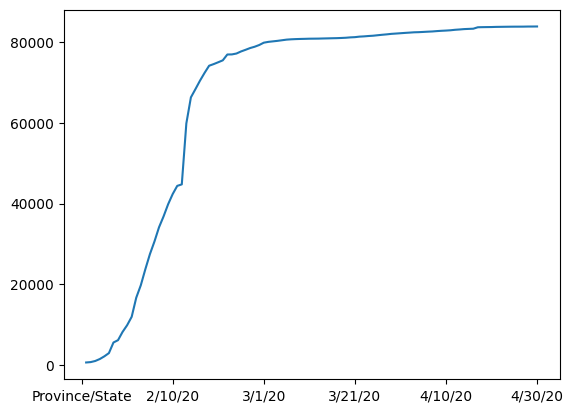

In [26]:
#Converting the data to numeric values
df_aggregated = df_aggregated.apply(pd.to_numeric, errors='coerce')
df_aggregated.loc["China"].plot()

Not sure if it was necessary - I'm sure there is a better way, I just wanted to have same structure as practice here. 

Here we can see the cumulative number of cases related to China
This plot shows data from 22th of Jan to 30th of Apr

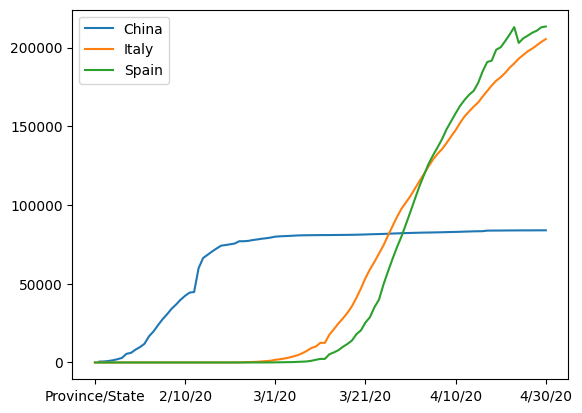

In [27]:
#Compare the cumulative number of confirmed cases in China, Italy and Spain
df_aggregated.loc["China"].plot()
df_aggregated.loc["Italy"].plot()
df_aggregated.loc["Spain"].plot()
plt.legend() 

### Task3: Calculating a good measure 
We need to find a good measure reperestend as a number which can describe the spread of the virus in a country. First we limited the time period in the graph and new time period is the first three days of January

<Axes: >

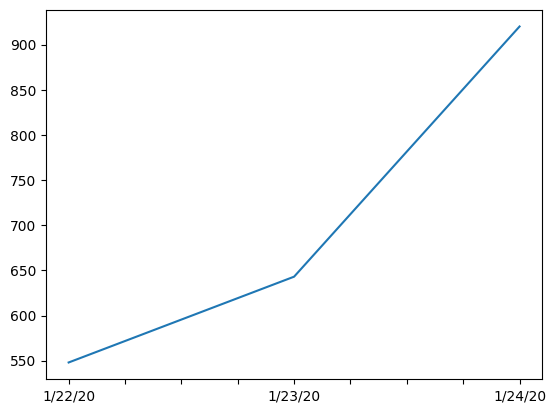

In [31]:
#show the data for the time period of first three days for China
df_aggregated.loc["China"][:4].plot()

We can see that in the 22th of January there is 550 cases and 24 hours later it increased by 100 and become 650 cases. 
Also we can see that in 24th of January the number of cases is 900 and it grows during next 24 hours by 250 cases.

Here we want to find a proper measure to describe the spread of virus in this period of time:
The spread of the virus can be described by the average number of new confirmed cases. However here we can consider the maximum number of new cases during the three days in each country.

To find the rate of this curve, we calculate the first derivative of this curve.

### Task 3.1: Caculate the first derivative of the curve

<Axes: >

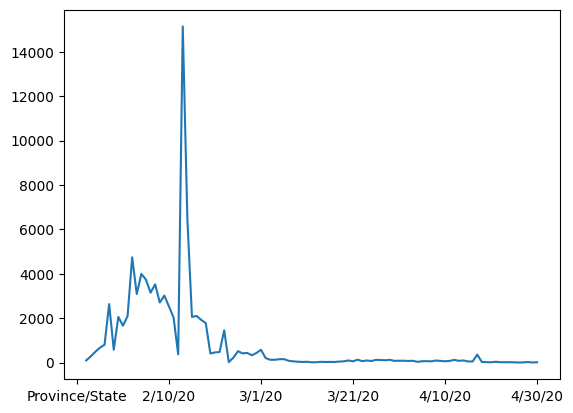

In [32]:
df_aggregated.loc["China"].diff().plot()

### Task 3.2: Find maxmimum infection rate for China

In [33]:
df_aggregated.loc["China"].diff().max()

15136.0

This plot shows us the change in infection rate day by day in our time period. We are looking for the maximum which is the peack of the graph. To calculate the max value we use max() after diff().
This number tells us that in one day or 24 hours - 15136 new cases have been intected 

In [34]:
#Calculate the max value for Itay
df_aggregated.loc["Italy"].diff().max()

6557.0

In [35]:
#The maximum number of infected cases in one day for Spain
df_aggregated.loc["Spain"].diff().max()

9630.0

### Task 3.3: Find maximum infection rate for all of the countries. 

In [36]:
countries = list(df_aggregated.index)
max_infection_rates = []  # an empty list for max number
for c in countries:
    max_infection_rates.append(df_aggregated.loc[c].diff().max()) #it returns a number so we can append it directly

#max_infection_rates

# Add this list as a new column to the dataframe

df_aggregated["max_infected_rate"] = max_infection_rates
df_aggregated.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infected_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0.0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0.0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0.0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0.0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


### Task 3.4: Create a new dataframe with only needed column 

In [39]:
covid_data = pd.DataFrame(df_aggregated["max_infected_rate"])
covid_data.head()

,max_infected_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


### Task4: 
- Importing the WorldHappinessReport.csv dataset
- Selecting needed columns for our analysis 
- Join the datasets 
- Ccalculate the correlations as the result of our analysis

### Task 4.1 : Importing the dataset

In [40]:
df_happiness_rep_csv = pd.read_csv("Databases/worldwide_happiness_report.csv")

In [41]:
df_happiness_rep_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Task 4.2: Drop the irrelevant columns 

In [42]:
#Make a list of columns that we want to drop
drop_col = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]

In [43]:
df_happines = df_happiness_rep_csv.drop(drop_col, axis=1)
df_happines.head() # now we have the life factors related to countries

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Task 4.3: Changing the indices of the dataframe

In [44]:
df_happines.set_index("Country or region", inplace=True)

In [45]:
df_happines.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Task4.4: Join two dataset

#### Corona Dataset :

In [50]:
covid_data.head()


,max_infected_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [51]:
covid_data.shape  #Shape is a property of datafram so it is not callable

(187, 1)

#### wolrd happiness report Dataset :

In [48]:
df_happines.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [52]:
df_happines.shape

(156, 4)

Since the number of row in covid_data is more than the other dataset, it is better to use the "inner join"

In [53]:
joint_data = covid_data.join(df_happines, how="inner")
joint_data.head()


,max_infected_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Task 4.5: Correlation matrix 

We want to see if there is any correlation betwene the "max rate of infection" and the life factors. to do so we need a correlation matrix

In [54]:
joint_data.corr()

,max_infected_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infected_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


The corr() method gives us a correltaion matrix which consists of correlation coefficients of every two columns in our dataset. as this value gets higher, the correlation between the two variable it higher. From the matrix above we can wee there is positive correltion between all life factors and max rate of infection

### Task 5: Visualize of the results
Our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

In [55]:
joint_data.head()

,max_infected_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Task 5.1: Plotting GDP vs maximum Infection rate

GDP per capita on x-axis and max infection rate on y-axis.

<Axes: xlabel='GDP per capita', ylabel='max_infected_rate'>

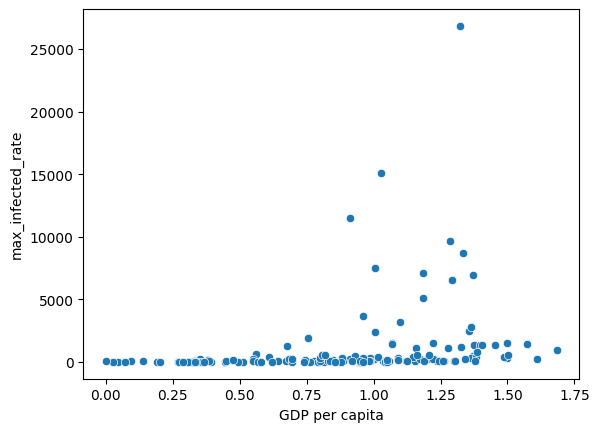

In [68]:
#The code bellow from the guided instruction did not work here, therefore I needed to update the code, but kept the original one as comment
#x = joint_data["GDP per capita"]
#y = joint_data["max_infected_rate"]
#sns.scatterplot(x,y)

x = joint_data["GDP per capita"]
y = joint_data["max_infected_rate"]
sns.scatterplot(x=x, y=y)

The graph shows us as GDP grows the number of max infection also growing. However, it does not give us enough data which is because of scale difference between variables.
the y axis the range of values are between 0 to 25000 but xaxis is from 0 to 1.75. to solve this proble we use the "log scaling"

<Axes: xlabel='GDP per capita', ylabel='max_infected_rate'>

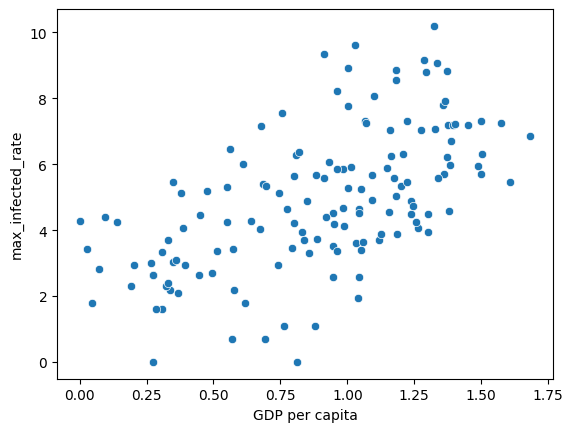

In [69]:
#Chaneg the range of y values to 0 to 10
sns.scatterplot(x=x, y=np.log(y))

Now we can see more detail in our graph. The slope shows there is acorrelation betwene two variables whcih as GDP increased the max number of infected case also increased.

<Axes: xlabel='GDP per capita', ylabel='max_infected_rate'>

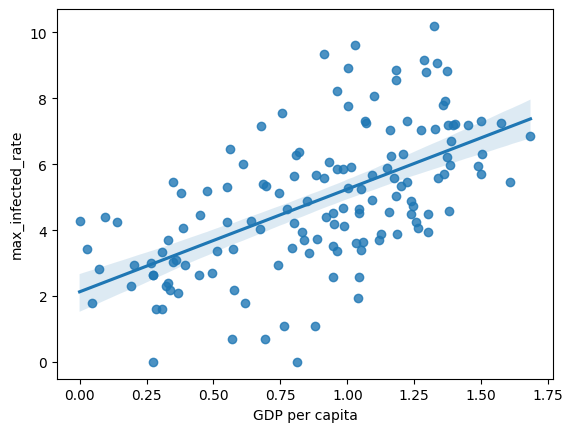

In [71]:
# the reg plot will fit the curve into the dataset
sns.regplot(x=x,y=np.log(y))

Now we have a fitted line which gives us a better visualization of the relation between two varibales. it shows a positive slope between these two variables

### Result
The intersting results from this analysis:

results show that people who are living in developed countries are more prone to getting infection of corona with compared of less developed countries.
We do the same analysis on the deaths dataset to see whether the lacing of the test kit hasany influence on the results

### Task 5.2: Plotting Social support vs maximum Infection rate

<Axes: xlabel='Social support', ylabel='max_infected_rate'>

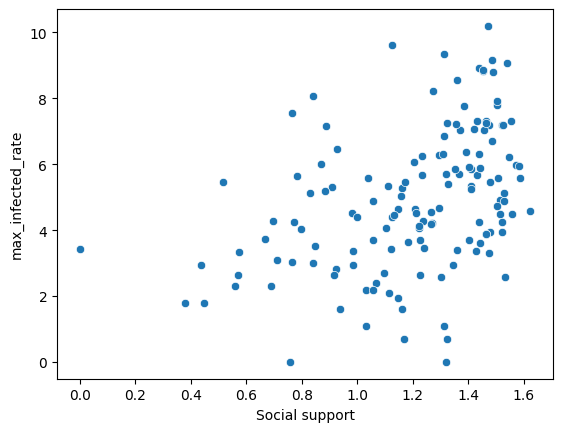

In [72]:
social_support = joint_data["Social support"]
sns.scatterplot(x=social_support, y=np.log(y))

<Axes: xlabel='Social support', ylabel='max_infected_rate'>

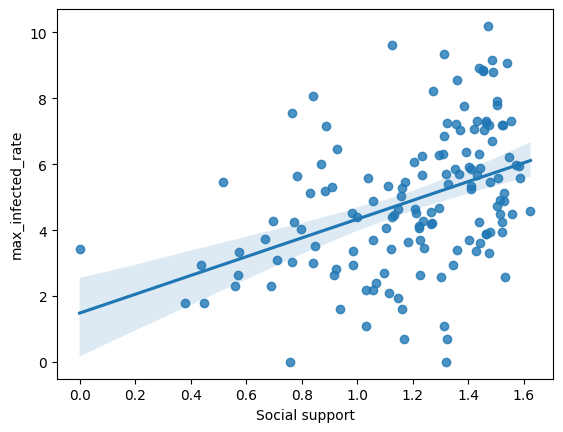

In [73]:
sns.regplot(x=social_support, y=np.log(y))

### Task 5.3: Plotting Healthy life expectancy vs maximum Infection rate

<Axes: xlabel='Healthy life expectancy', ylabel='max_infected_rate'>

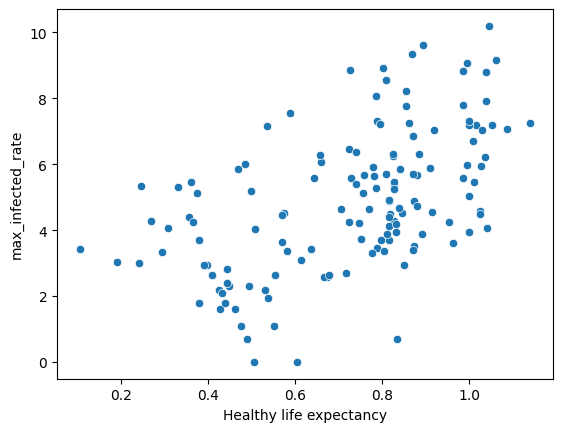

In [74]:
health_life_exp=joint_data["Healthy life expectancy"]
sns.scatterplot(x=health_life_exp,y=np.log(y))

<Axes: xlabel='Healthy life expectancy', ylabel='max_infected_rate'>

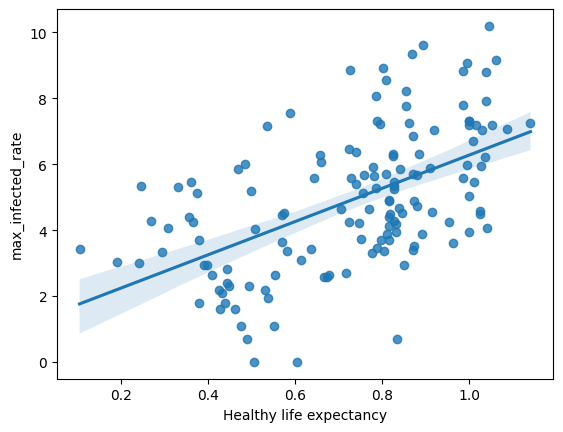

In [75]:
sns.regplot(x=health_life_exp,y=np.log(y))

### Task 5.4: Plotting Freedom to make life choices vs maximum Infection rate

<Axes: xlabel='Freedom to make life choices', ylabel='max_infected_rate'>

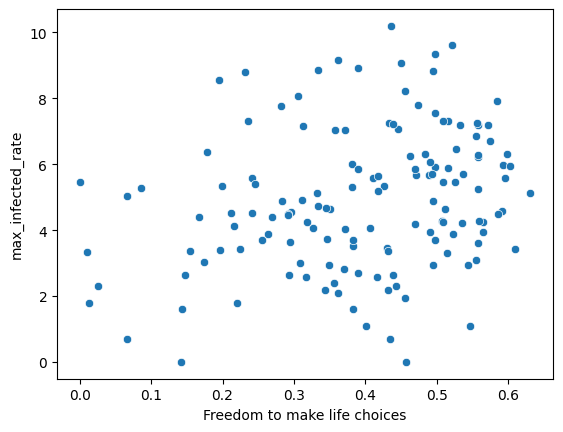

In [76]:
free_choice=joint_data["Freedom to make life choices"]
sns.scatterplot(x=free_choice,y=np.log(y))

<Axes: xlabel='Freedom to make life choices', ylabel='max_infected_rate'>

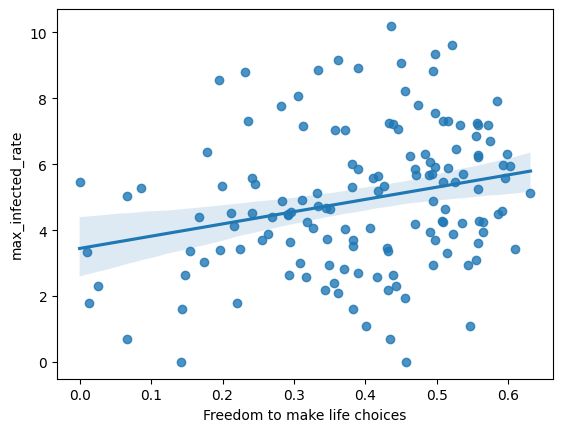

In [77]:
sns.regplot(x=free_choice,y=np.log(y))